In [23]:
#   part 1
import pandas as pd
import numpy as np

class ATLASData:
    def __init__(self, file_path):
        self.data = self.load_data(file_path)
        self.calculate_invariant_mass()  # Calculate it upon initialization

    def load_data(self, file_path):
        return pd.read_csv(file_path)

    def calculate_4_momentum(self, pt, eta, phi, E):
        px = pt * np.cos(phi)
        py = pt * np.sin(phi)
        pz = pt * np.sinh(eta)
        return np.array([px, py, pz, E])

    def calculate_invariant_mass(self):
        invariant_masses = []
        for i in range(len(self.data)):
            p1 = self.calculate_4_momentum(
                self.data.iloc[i, 0], self.data.iloc[i, 2], self.data.iloc[i, 4], self.data.iloc[i, 6]
            )
            p2 = self.calculate_4_momentum(
                self.data.iloc[i, 1], self.data.iloc[i, 3], self.data.iloc[i, 5], self.data.iloc[i, 7]
            )
            m = self.calculate_invariant_mass_pair(p1, p2)
            invariant_masses.append(m)
        self.data['invariant_mass'] = invariant_masses
    @staticmethod
    def calculate_invariant_mass_pair(p1, p2):
        p_total = p1 + p2
        E_total = p_total[3]
        px_total = p_total[0]
        py_total = p_total[1]
        pz_total = p_total[2]
        invariant_mass = np.sqrt(E_total**2 - (px_total**2 + py_total**2 + pz_total**2))
        return invariant_mass

#   Load the data
file_path = 'atlas_z_to_ll.csv'
atlas_data = ATLASData(file_path)
data = atlas_data.data

print(data.head())

print(data['invariant_mass'].head())

         pt1        pt2      eta1      eta2      phi1      phi2          E1  \
0  33.144898  21.067385  2.176089 -0.139190  0.214251 -2.670418  147.913470   
1  42.871246  37.205387  0.067116 -0.946074 -0.132653 -2.926308   42.967840   
2  33.070188  29.222084 -0.366347 -2.146044  2.462502 -0.861610   35.314297   
3  28.597910  19.120684  1.951096  2.089655 -1.353901  1.913332  102.645260   
4  49.459629  35.819855 -1.319296 -0.482460  1.621212 -1.404498   99.119836   

           E2  invariant_mass  
0   21.271793       92.150037  
1   55.135395       89.282450  
2  126.647130       88.274725  
3   78.450766       46.788243  
4   40.070199       91.529042  
0    92.150037
1    89.282450
2    88.274725
3    46.788243
4    91.529042
Name: invariant_mass, dtype: float64


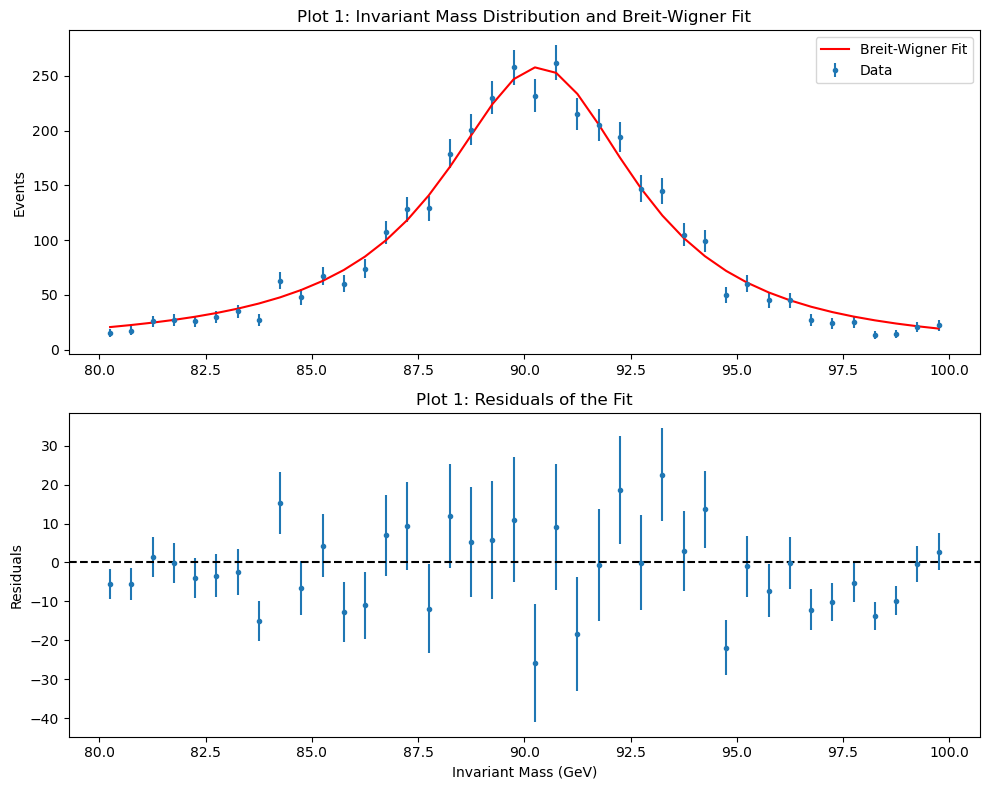

Fitted Mass: 90.3 GeV
Mass Uncertainty: 0.1 GeV
Chi-Square: 62.5
Reduced Chi-Square: 1.7
P-Value: 0.0


In [24]:
#   part 2
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import numpy as np

class BreitWignerFitter:
    @staticmethod
    def breit_wigner(x, m_z, gamma_z, A):
        return A / ((x**2 - m_z**2)**2 + m_z**2 * gamma_z**2)

    def fit_breit_wigner_to_data(self, data, bins, bin_centers):
        hist, _ = np.histogram(data, bins=bins)
        popt, pcov = curve_fit(self.breit_wigner, bin_centers, hist, p0=[91.2, 2, 1000])  # Initial guesses
        return popt, pcov

    def plot_fit_with_residuals(self, data, bins, bin_centers, popt, pcov):

        hist, _ = np.histogram(data, bins=bins)
        fig, axs = plt.subplots(2, 1, figsize=(10, 8))

        #   Main plot
        axs[0].errorbar(bin_centers, hist, yerr=np.sqrt(hist), fmt='.', label='Data')
        axs[0].plot(bin_centers, self.breit_wigner(bin_centers, *popt), 'r-', label='Breit-Wigner Fit')
        axs[0].set_ylabel('Events')
        axs[0].set_title('Plot 1: Invariant Mass Distribution and Breit-Wigner Fit')
        axs[0].legend()

        #   Residuals plot
        residuals = hist - self.breit_wigner(bin_centers, *popt)
        axs[1].errorbar(bin_centers, residuals, yerr=np.sqrt(hist), fmt='.')
        axs[1].axhline(0, color='black', linestyle='--')
        axs[1].set_xlabel('Invariant Mass (GeV)')
        axs[1].set_ylabel('Residuals')
        axs[1].set_title('Plot 1: Residuals of the Fit')

        plt.tight_layout()
        plt.show()

    def calculate_goodness_of_fit(self, data, bins, bin_centers, popt):

        hist, _ = np.histogram(data, bins=bins)
        expected = self.breit_wigner(bin_centers, *popt)
        chi2_val = np.sum((hist - expected)**2 / expected)
        degrees_of_freedom = len(bin_centers) - len(popt)
        red_chi2 = chi2_val / degrees_of_freedom
        p_value = 1 - chi2.cdf(chi2_val, degrees_of_freedom)
        return chi2_val, red_chi2, p_value

    def calculate_mass_and_uncertainty(self, popt, pcov):

        mass = popt[0]
        mass_uncertainty = np.sqrt(pcov[0, 0])
        return mass, mass_uncertainty

#   Main execution
fitter = BreitWignerFitter()
bins = np.linspace(80, 100, 41)
bin_centers = (bins[:-1] + bins[1:]) / 2

popt, pcov = fitter.fit_breit_wigner_to_data(data['invariant_mass'].values, bins, bin_centers)
fitter.plot_fit_with_residuals(data['invariant_mass'].values, bins, bin_centers, popt, pcov)

chi2_val, red_chi2, p_value = fitter.calculate_goodness_of_fit(data['invariant_mass'].values, bins, bin_centers, popt)
mass, mass_uncertainty = fitter.calculate_mass_and_uncertainty(popt, pcov)

print(f"Fitted Mass: {mass:.1f} GeV")
print(f"Mass Uncertainty: {mass_uncertainty:.1f} GeV")
print(f"Chi-Square: {chi2_val:.1f}")
print(f"Reduced Chi-Square: {red_chi2:.1f}")
print(f"P-Value: {p_value:.1f}")

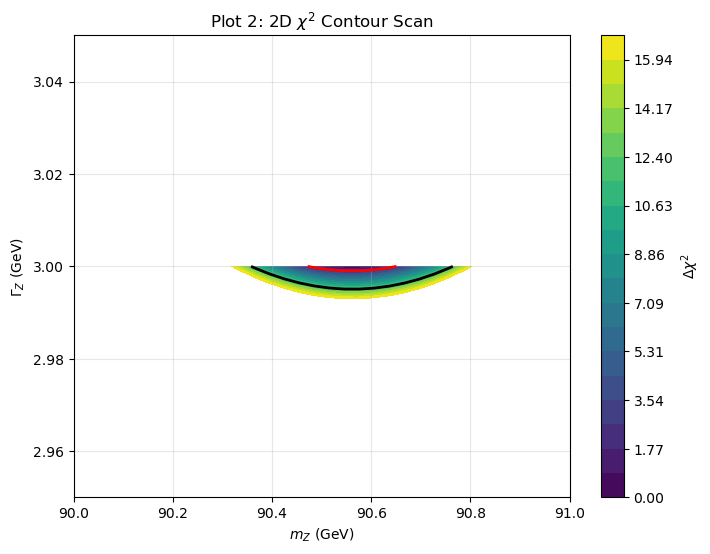

In [25]:
#   part 3
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import curve_fit
import numpy as np

class ChiSquareAnalysis:
    def __init__(self, data):
        self.data = data
        self.mass_values = None
        self.width_values = None
        self.chi2_values = None
        self.min_chi2 = None  # Initialize min_chi2

    @staticmethod
    def breit_wigner(x, m_z, gamma_z, A):
        return A / ((x**2 - m_z**2)**2 + m_z**2 * gamma_z**2)

    def calculate_chi2(self, data, bins, m_z, gamma_z, A):
        hist, _ = np.histogram(data, bins=bins)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        expected = self.breit_wigner(bin_centers, m_z, gamma_z, A)
        chi2 = np.sum((hist - expected)**2 / expected)
        return chi2

    def perform_parameter_scan(self, mass_range, width_range, bins):
        self.mass_values = np.linspace(mass_range[0], mass_range[1], 100)
        self.width_values = np.linspace(width_range[0], width_range[1], 100)
        self.chi2_values = np.zeros((len(self.mass_values), len(self.width_values)))

        #   Get the histogram of the data
        hist, _ = np.histogram(self.data, bins=bins)
        bin_centers = (bins[:-1] + bins[1:]) / 2

        #   Initial fit to get a reasonable estimate for A
        popt, _ = curve_fit(self.breit_wigner, bin_centers, hist, p0=[91.2, 2, 1000])  # Initial guesses
        A_fit = popt[2]

        for i, m in enumerate(self.mass_values):
            for j, w in enumerate(self.width_values):
                self.chi2_values[i, j] = self.calculate_chi2(self.data, bins, m, w, A_fit)

        self.min_chi2 = np.min(self.chi2_values) 

    def plot_contour_scan(self):
        if self.chi2_values is None or self.mass_values is None or self.width_values is None:
            raise ValueError("Parameter scan must be performed before plotting.")

        delta_chi2_1sigma = chi2.isf(0.317, 2)  
        delta_chi2_3sigma = chi2.isf(0.0027, 2)

        fig, ax = plt.subplots(figsize=(8, 6))
        contourf = ax.contourf(  
            self.mass_values,
            self.width_values,
            self.chi2_values.T - self.min_chi2,  
            levels=np.linspace(0, delta_chi2_3sigma + 5, 20),  
            cmap='viridis',  
        )
        cbar = fig.colorbar(contourf, ax=ax, label=r'$\Delta\chi^2$')  # Add a colorbar
        contour_lines = ax.contour(
            self.mass_values,
            self.width_values,
            self.chi2_values.T - self.min_chi2,
            levels=[delta_chi2_1sigma, delta_chi2_3sigma],
            colors=['red', 'black'],
            linewidths=[2, 2],
        )
        ax.clabel(contour_lines, inline=True, fontsize=10, fmt=r'$\Delta\chi^2 = %1.1f$')  # Add contour labels
        ax.set_xlabel(r'$m_Z$ (GeV)')
        ax.set_ylabel(r'$\Gamma_Z$ (GeV)')
        ax.set_title(r'Plot 2: 2D $\chi^2$ Contour Scan')
        ax.grid(True, alpha=0.3)

        #   Adjust plot limits
        ax.set_xlim(90.0, 91.0)  
        ax.set_ylim(2.95, 3.05)    

        plt.show()

if __name__ == '__main__':
    #   Load data using ATLASData class
    file_path = 'atlas_z_to_ll.csv'
    atlas_data = ATLASData(file_path)
    data = atlas_data.data['invariant_mass'].values

    #   Define the bins, mass range, and width range for the scan
    bins = np.linspace(80, 100, 41)  # As used in Part 4
    mass_range = [90, 93]
    width_range = [1, 3]

    #   Perform the chi-square analysis and plot the results
    chi2_analysis = ChiSquareAnalysis(data)
    chi2_analysis.perform_parameter_scan(mass_range, width_range, bins)
    chi2_analysis.plot_contour_scan()